Name - NagaSaiBabu Kota
ID - **999901336**
Homework-1


- Perform basic data engineering

Task: Data Extraction, Selection and Transformation

In [44]:
import pandas as pd
import numpy as np

import os
import requests
import zipfile as zf

import io
import shutil

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics.pairwise import euclidean_distances

import sys

from sklearn import decomposition

In [3]:
# fetch the fars data from nhtsa
cwd = os.getcwd()
for year in range(1975, 2021, 5):
    res = requests.get('https://static.nhtsa.gov/nhtsa/downloads/FARS/{0}/National/FARS{0}NationalCSV.zip'.format(year))
    zip = zf.ZipFile(io.BytesIO(res.content))
    # extract the data to the data folder
    data_path = os.path.join(cwd,'data',str(year))
    zip.extractall(data_path)

In [4]:
# copy the accident.csv file from each year to a new folder
accident_directory = "accident_all_years"
path = os.path.join(cwd, accident_directory)
os.mkdir(path)

for year in range(1975,2021,5):
    # new path to store the accident.csv 
    accident_path = os.path.join(cwd,'data',str(year),'ACCIDENT.csv')
    new_path = os.path.join(cwd,'accident_all_years',str(year)+'_accident.csv')
    # shutil is used to copy the file
    shutil.copy(accident_path, new_path)

Manipulate and analyze the data from NHTSA

Task: Descriptive Statistics / Exploratory Data Analysis

(a) What is the overall number fatal accidents for the entire dataset period from 1975-2020? (Note: the denomenator is the total number of accidents)

(b) How many people died over that period? How many total people were involved (fatal and non-fatal)?

(c) What proportion of accidents occurred between 9pm and 4am (overnight)?

(d) What proportion of accidents occurred when the weather was snowy?

In [19]:
# accidents count of fatal and total
acci_fatal = 0
acci_total = 0

# total number of deaths and people involved in accidents
deaths = 0
involved = 0

# accidents occured in the night between 9pm and 4am
night = 0

# accidents occured when it was snowy
snowy = 0

for year in range(1975,2021,5):
    accident_path = 'accident_all_years/{0}_accident.csv'.format(year)
    data_frame = pd.read_csv(accident_path,encoding='latin-1')
    
    # get the count of total and fatal accidents for each year
    acci_total += data_frame.shape[0]
    acci_fatal += data_frame[data_frame['FATALS'] > 0]['FATALS'].count()

    # get the count of number of deaths and number of fatal accidents
    deaths += data_frame['FATALS'].sum()
    involved += data_frame['PERSONS'].sum()

    # get the accidents occured during the night
    night += data_frame[(data_frame['HOUR']>=21) | (data_frame['HOUR']<=4)]['HOUR'].count()

    # get the accidents occured when it was snowing
    snowy += data_frame[data_frame['WEATHER']==4]['WEATHER'].count()

print("a)")
print("Fatal accidents = ",acci_fatal/acci_total)
print()

print("b)")
print("Total deaths = ",deaths)
print("Total involved = ",involved)
print()

print("c)")
print("Accidents occurred between 9pm and 4am = ", night)
print()

print("d)")
print("Accidents occurred when the weather was snowy = ", snowy)
print()

a)
Fatal accidents =  0.9999734110439887

b)
Total deaths =  418619
Total involved =  955696

c)
Accidents occurred between 9pm and 4am =  134869

d)
Accidents occurred when the weather was snowy =  6149



(e) Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).

<AxesSubplot:>

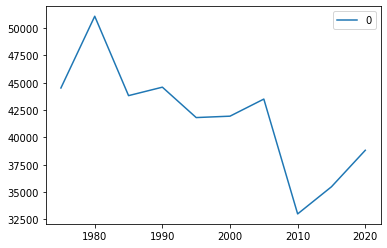

In [21]:
# fatalities each year
fatalities = []
# store the year under consideration
years = []

for year in range(1975,2021,5):
    accident_path = 'accident_all_years/{0}_accident.csv'.format(year)
    data_frame = pd.read_csv(accident_path,encoding='latin-1')

    # get the number of fatal accidents
    years.append(year)
    fatalities.append(data_frame['FATALS'].sum())

# plot the fatalitie per year
fatalitie_year = pd.DataFrame(fatalities,index=years)
fatalitie_year.plot()

(f) Make a general statement about what you observe in the line graph. 

The lowest level was during 2010.

Task: Descriptive Statistics / Exploratory Data Analysis

(a) From 1975-2020, what was the average (mean) rate of fatal accidents which involved an intoxicated driver? This would
be over all states.

In [23]:
# fatal accidents rate which involved an intoxicated driver
fatal_accidents_rate = 0
for year in range(1975,2021,5):
    accident_path = 'accident_all_years/{0}_accident.csv'.format(year)
    data_frame = pd.read_csv(accident_path,encoding='latin-1')

    # get total accidents and accidents where the driver was intoxicated
    accidents_total = data_frame['FATALS'].count()
    intoxicated = data_frame[(data_frame['FATALS'] > 0) & ( data_frame['DRUNK_DR']>0)]['DRUNK_DR'].count()
    
    # get the rate per year
    fatal_accidents_rate += intoxicated/accidents_total

print("Average rate of fatal accidents = ", fatal_accidents_rate)

Average rate of fatal accidents =  3.285263841494462


(b) In 1975 which 5 states had the highest rate of fatal accidents involving an intoxicated driver? Which 5 had the least?
Please list the states and the rates in a table in the notebook.

In [26]:
# consider the data of year 1975
data_frame = pd.read_csv('accident_all_years/1975_accident.csv')

# get accidents which were fatal and the driver was intoxicated
data_frame1 = data_frame[(data_frame['FATALS'] > 0) & (data_frame['DRUNK_DR'] > 0)]

# group the data by state
data_frame1 = data_frame1.groupby(['STATE']).agg("count")

# sort the data
data_frame1 = data_frame1.reset_index().sort_values("FATALS",ascending=False).set_index(['STATE',"FATALS"])

# top 5 states
data_frame1.head()

,,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,...,ARR_MIN,SCH_BUS,CF1,CF2,CF3,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
6,1450,1450,1450,1450,1450,1450,1450,1450,1450,0,1450,...,1450,0,1450,1450,1450,1450,1450,1450,1450,1450
26,424,424,424,424,424,424,424,424,424,0,424,...,424,0,424,424,424,424,424,424,424,424
17,387,387,387,387,387,387,387,387,387,0,387,...,387,0,387,387,387,387,387,387,387,387
12,384,384,384,384,384,384,384,384,384,0,384,...,384,0,384,384,384,384,384,384,384,384
47,333,333,333,333,333,333,333,333,333,0,333,...,333,0,333,333,333,333,333,333,333,333


In [25]:
# bottom 5 states
data_frame1.tail()

,,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,...,ARR_MIN,SCH_BUS,CF1,CF2,CF3,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
1,14,14,14,14,14,14,14,14,14,0,14,...,14,0,14,14,14,14,14,14,14,14
18,12,12,12,12,12,12,12,12,12,0,12,...,12,0,12,12,12,12,12,12,12,12
28,9,9,9,9,9,9,9,9,9,0,9,...,9,0,9,9,9,9,9,9,9,9
37,5,5,5,5,5,5,5,5,5,0,5,...,5,0,5,5,5,5,5,5,5,5
35,5,5,5,5,5,5,5,5,5,0,5,...,5,0,5,5,5,5,5,5,5,5


(c) By 1990, how much had the top and bottom 5 changed (if at all)?

In [27]:
# consider the data of year 1990
data_frame = pd.read_csv('accident_all_years/1990_accident.csv')

# get accidents which were fatal and the driver was intoxicated
data_frame1 = data_frame[(data_frame['FATALS'] > 0) & (data_frame['DRUNK_DR'] > 0)]

# group the data by state
data_frame1 = data_frame1.groupby(['STATE']).agg("count")

# sort the data
data_frame1 = data_frame1.reset_index().sort_values("FATALS",ascending=False).set_index(['STATE',"FATALS"])

# top 5 states
data_frame1.head()

,,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,FED_AID,ROAD_FNC,...,CF1,CF2,CF3,DAY_WEEK,DRUNK_DR,ST_CASE,MILEPT,CITY,TWAY_ID,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
6,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975,...,1975,1975,1975,1975,1975,1975,1975,1975,1975,1975
48,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,...,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265
12,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
42,623,623,623,623,623,623,623,623,623,623,623,...,623,623,623,623,623,623,623,623,623,623
26,617,617,617,617,617,617,617,617,617,617,617,...,617,617,617,617,617,617,617,617,617,617


In [28]:
# bottom 5 states
data_frame1.tail()

,,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,FED_AID,ROAD_FNC,...,CF1,CF2,CF3,DAY_WEEK,DRUNK_DR,ST_CASE,MILEPT,CITY,TWAY_ID,RAIL
STATE,FATALS,,,,,,,,,,,,,,,,,,,,,
38,48,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
50,44,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
44,41,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
2,41,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
11,20,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


Top 5: 

3 out of 5 states changed



Bottom 5: 

In bottom 5 all the states have changed

(d) What was the average (mean) rate in 2020?

In [30]:
# consider the data of year 2020
data_frame = pd.read_csv('accident_all_years/2020_accident.csv',encoding='latin-1')

# get accidents which were fatal and the driver was intoxicated
data_frame1 = data_frame[(data_frame['FATALS'] > 0) & ( data_frame['DRUNK_DR']>0)]['FATALS']

# get mean data
data_frame1.agg("mean")

1.108698001080497

(e) Plot a graph with the top and bottom five states, showing just the rate over time (from 1975-2020). You can plot these in
two graphs (top 5 and bottom 5 do not have to be in the same graph).

In [31]:
years = []

# top and bottom fatalities per year
top_fatalities = []
bottom_fatalities = []

for year in range(1975,2021,5):
    accident_path = 'accident_all_years/{0}_accident.csv'.format(year)
    data_frame = pd.read_csv(accident_path,encoding='latin-1')

    # get accidents which were fatal and the driver was intoxicated
    data_frame1 = data_frame[(data_frame['FATALS'] > 0) & ( data_frame['DRUNK_DR']>0)]
    # group the data by state
    data_frame1 = data_frame1.groupby(['STATE']).agg("count")
    # sort the data
    data_frame1 = data_frame1.reset_index().sort_values("FATALS",ascending=False).set_index(["FATALS"])

    # consider top 5 and bottom 5
    top = data_frame1.head()
    bottom = data_frame1.tail()

    years.append(year)

    # add the top 5 to the top fatalities list
    lst = top['DRUNK_DR'].tolist()
    top_fatalities.append(lst)

    # add the bottom 5 to the bottom fatalities list
    lst = bottom['DRUNK_DR'].tolist()
    bottom_fatalities.append(lst)

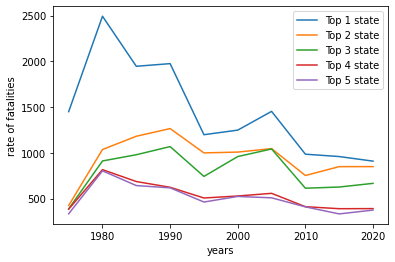

In [32]:
# convert top fatalities to an array
arr=np.array(top_fatalities)

for i in range(5):
    y=arr[:,i]
    plt.plot(years,y,label="Top "+str(i+1)+" state")

# plot the top fatalities
plt.xlabel("years")
plt.ylabel("rate of fatalities")

plt.legend()
plt.show()

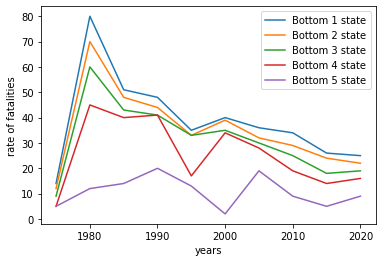

In [33]:
# convert bottom fatalities to an array
arr=np.array(bottom_fatalities)

for i in range(5):
    y=arr[:,i]
    plt.plot(years,y,label="Bottom "+str(i+1)+" state")

plt.xlabel("years")
plt.ylabel("rate of fatalities")

# plot the bottom fatalities
plt.legend()
plt.show()

(f) What is your interpretation of the trend – pretend you have no knowledge about the changes in law, changes in BAC
thresholds or changes in public messaging about DUIs.

The rates were highest for both top and bottom 5 in 1980

Task: Distance Metrics / Exploratory Data Analysis

(a) You will create a subset of the data over all years.

In [34]:
# columns under consideration
col = ['STATE','MONTH','DAY','YEAR','HOUR','PERSONS','MAN_COLL','LGT_COND','WEATHER','SCH_BUS','FATALS','DAY_WEEK','DRUNK_DR']


data_frame = pd.DataFrame(columns=col)

for year in range(1975,2021,5):
    accident_path = 'accident_all_years/{0}_accident.csv'.format(year)

    # get the accident data from each year
    data_frame1 = pd.read_csv(accident_path,encoding='latin-1')
    
    # consider only the above column
    data_frame1 = data_frame1[col]
    data_frame1 = data_frame1.sample(n=500)

    
    data_frame = pd.concat([data_frame, data_frame1])

data_frame = data_frame.dropna()

(b) Scale the data from part (a) such that all values are between 0 and 1.

In [35]:
# scale the data
min_max_scale = MinMaxScaler()

# generate the model
model = min_max_scale.fit(data_frame)

# transform the data
scaled_data = model.transform(data_frame)

(c) Compute the distance metric of all 5000 values using Euclidean distance and build a distance table.

In [37]:
euclidean_distance_table = euclidean_distances(scaled_data,scaled_data)

(d) Pick 2 random rows from your original 5000 and find the 20 nearest neighbors of each . Use a single sentence to describe
the two collections of 20. You can pretend these each represent a cluster. You must show full work in your notebook.

In [40]:

# select random row 1 : 300
row = np.array(euclidean_distance_table[300])

# sort it
arg = row.argsort()

arg[:20]

print(data_frame.iloc[425])

for i in range(20):
    print(data_frame.iloc[arg[i]])

STATE       45
MONTH        1
DAY          4
YEAR        80
HOUR        17
PERSONS      2
MAN_COLL     2
LGT_COND     5
WEATHER      4
SCH_BUS      0
FATALS       1
DAY_WEEK     6
DRUNK_DR     0
Name: 35815, dtype: object
STATE       48
MONTH       12
DAY         28
YEAR        80
HOUR        15
PERSONS      2
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     1
DRUNK_DR     0
Name: 41388, dtype: object
STATE       51
MONTH       12
DAY         17
YEAR        95
HOUR        13
PERSONS      2
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     1
DRUNK_DR     0
Name: 35471, dtype: object
STATE       47
MONTH       12
DAY         24
YEAR        90
HOUR        16
PERSONS      1
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     2
DRUNK_DR     0
Name: 33692, dtype: object
STATE       51
MONTH       12
DAY         22
YEAR        80
HOUR        16
PERSONS      1
MAN_COLL     0
LGT_CON

In [41]:
# select random row 1 : 100
row = np.array(euclidean_distance_table[100])

# sort it
arg = row.argsort()

arg[:20]

print(data_frame.iloc[37])

for i in range(20):
    print(data_frame.iloc[arg[i]])

STATE        6
MONTH        1
DAY         27
YEAR        80
HOUR         0
PERSONS      3
MAN_COLL     4
LGT_COND     3
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     1
DRUNK_DR     1
Name: 2937, dtype: object
STATE       19
MONTH        7
DAY         16
YEAR        80
HOUR        23
PERSONS      1
MAN_COLL     0
LGT_COND     2
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 15873, dtype: object
STATE       20
MONTH        7
DAY         23
YEAR        80
HOUR        23
PERSONS      1
MAN_COLL     0
LGT_COND     2
WEATHER      9
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 16378, dtype: object
STATE       17
MONTH        6
DAY         11
YEAR        80
HOUR        15
PERSONS      2
MAN_COLL     0
LGT_COND     1
WEATHER      1
SCH_BUS      0
FATALS       1
DAY_WEEK     4
DRUNK_DR     0
Name: 13459, dtype: object
STATE       25
MONTH        7
DAY         17
YEAR        85
HOUR        13
PERSONS      2
MAN_COLL     4
LGT_COND

Task: PCA / Exploratory Data Analysis

a) How many components are necessary to capture 90% of the data in the datast from the prior section. Show the plot of
the cummulative variance using PCA.explained_variance_ratio_

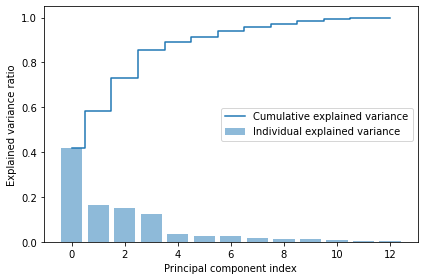

In [48]:
# use the PCA explained variance ratio
pca = decomposition.PCA()

# fit the data
pca1 = pca.fit_transform(scaled_data)

# get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# sum of eigenvalues
cummulative_sum_eigenvalues = np.cumsum(explained_variance_ratio)

# plot the graph
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cummulative_sum_eigenvalues)), cummulative_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

4 components are needed to for 90% variance.

(b) Please list which feature dominates the first component. To do this, you will need to get the feature with the largest value,
which corresponds to the column of the feature you are looking for, requiring a little backtracking

In [51]:
pca = decomposition.PCA(n_components=12)
fin = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
impones = explained_variance_ratio.argsort()

impnes=(abs( pca.components_ )[0]).argsort()

print("Feature dominating in 1st component is ",col[impnes[-1]])

Feature dominating in 1st component is  YEAR
